<h1 align='center' style='color:purple'>Clustering With K Means - Python Tutorial</h1>

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("income.csv")
df.head(20)

Name  Age  Income($)
0        Rob   27      70000
1    Michael   29      90000
2      Mohan   29      61000
3     Ismail   28      60000
4       Kory   42     150000
5     Gautam   39     155000
6      David   41     160000
7     Andrea   38     162000
8       Brad   36     156000
9   Angelina   35     130000
10    Donald   37     137000
11       Tom   26      45000
12    Arnold   27      48000
13     Jared   28      51000
14     Stark   29      49500
15    Ranbir   32      53000
16    Dipika   40      65000
17  Priyanka   41      63000
18      Nick   43      64000
19      Alia   39      80000

Text(0, 0.5, 'Income')

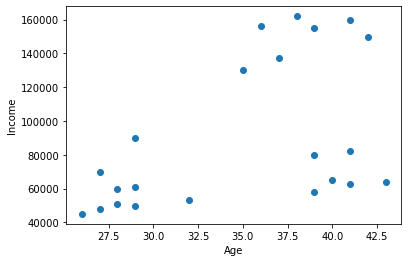

In [3]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income')

In [58]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [59]:
df['cluster']=y_predicted
df.head()

Name  Age  Income($)  cluster  SIncome($)      SAge  Scluster
0      Rob   27      70000        2    0.213675  0.058824         1
1  Michael   29      90000        2    0.384615  0.176471         1
2    Mohan   29      61000        0    0.136752  0.176471         1
3   Ismail   28      60000        0    0.128205  0.117647         1
4     Kory   42     150000        1    0.897436  0.941176         2

In [60]:
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

In [61]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

In [62]:
km.cluster_centers_


array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

In [63]:
km.cluster_centers_[:,0]
km.cluster_centers_[:,1]
#km.cluster_centers_[:,2]

array([ 56136.36363636, 150000.        ,  80500.        ])

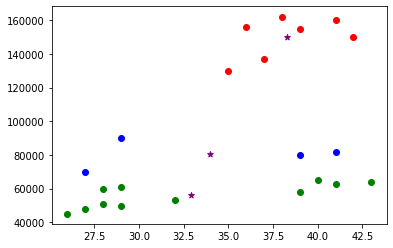

In [64]:
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

<h4 style='color:purple'>Preprocessing using min max scaler</h4>

In [65]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['SIncome($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['SAge'] = scaler.transform(df[['Age']])

In [66]:
df.head()

Name  Age  Income($)  cluster  SIncome($)      SAge  Scluster
0      Rob   27      70000        2    0.213675  0.058824         1
1  Michael   29      90000        2    0.384615  0.176471         1
2    Mohan   29      61000        0    0.136752  0.176471         1
3   Ismail   28      60000        0    0.128205  0.117647         1
4     Kory   42     150000        1    0.897436  0.941176         2

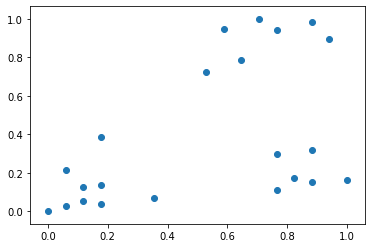

In [67]:
plt.scatter(df.SAge,df['SIncome($)'])

In [68]:
km1 = KMeans(n_clusters=3)
y_predicted1 = km1.fit_predict(df[['SAge','SIncome($)']])
y_predicted1

array([2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0])

In [69]:
df['Scluster']=y_predicted1
df.head()

Name  Age  Income($)  cluster  SIncome($)      SAge  Scluster
0      Rob   27      70000        2    0.213675  0.058824         2
1  Michael   29      90000        2    0.384615  0.176471         2
2    Mohan   29      61000        0    0.136752  0.176471         2
3   Ismail   28      60000        0    0.128205  0.117647         2
4     Kory   42     150000        1    0.897436  0.941176         1

In [70]:
km1.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428]])

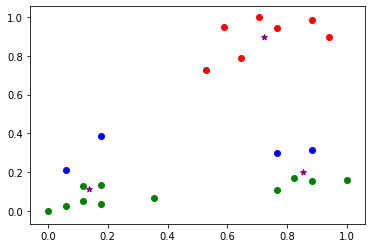

In [71]:
plt.scatter(df1.SAge,df1['SIncome($)'],color='green')
plt.scatter(df2.SAge,df2['SIncome($)'],color='red')
plt.scatter(df3.SAge,df3['SIncome($)'],color='blue')
plt.scatter(km1.cluster_centers_[:,0],km1.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

<h4 style='color:purple'>Elbow Plot</h4>

In [8]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

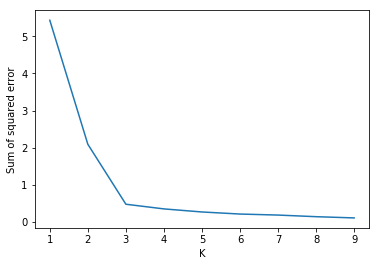

In [211]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [9]:
sse

[39748148458.545456,
 3318233941.161905,
 1577046058.8831167,
 814746044.2545455,
 296500418.0952381,
 231967084.4619048,
 174800337.70000005,
 119633613.78333332,
 92633459.7]

<h4 style='color:purple'>Exercise</h4>

<img src='iris.png' width=200 height=200>

1. Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.
2. Figure out if any preprocessing such as scaling would help here
3. Draw elbow plot and from that figure out optimal value of k